In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings("ignore")

# CNN Architecture


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.optimizers import Adam

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

2025-06-23 06:14:17.075800: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750659257.286204      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750659257.349055      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Dataset

The CIFAR (Canadian Institute For Advanced Research) dataset is a popular benchmark in machine learning and computer vision. It consists of two datasets:

CIFAR-10: 60,000 32x32 color images in 10 classes, with 6,000 images per class.
CIFAR-100: 60,000 32x32 color images in 100 classes, with 600 images per class.
Each dataset is divided into 50,000 training images and 10,000 test images.

Classes
CIFAR-10: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck


In [5]:
# loading dataset
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


# Display Sample Images with class labels


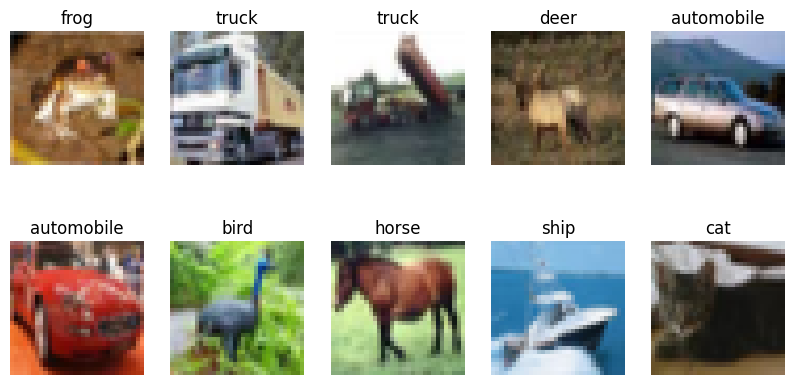

In [6]:
# Define the class labels
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Initialize the figure and subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through the first 10 images 
for i, ax in enumerate(axes.flat):
    # Select the image and label 
    image, label = x_train[i], y_train[i] 

    # Display the image
    ax.imshow(image, cmap='gray')

    # Set the title with the class label
    ax.set_title(f"{class_labels[label.item()]}")
    ax.axis('off')

# Display the figure 
plt.show()

In [7]:
# Normalizing the pixel values into 0 and 1

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [8]:
# convert the class vectors into binary class matrics / (one hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

# Define CNN Architecture 

In [10]:
# Define CNN Model
model = Sequential()

# Conv2D layer with 32 filters, kernal_size=3x3, input shape = (32,32,3) means 3 chanel based 32x32 pixel picture 
# Input_size = 32x32x3, kernal_size=3x3, number of kernal = 32, output size = 30x30x32
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))

# MaxPooling2D layer with pool size = 2x2
# output size = 15x15x2
model.add(MaxPooling2D((2,2)))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Conv2D layer with 64 filters, kernal_size=3x3
# Input_size= 15x15x32, kernal_size=3x3, number of kernals = 64, output size = 13x13x64
model.add(Conv2D(64, (3,3), activation='relu'))
# MaxPooling2D layer with pool size 2x2
# Output size: 6x6x64
model.add(MaxPooling2D((2,2)))


# Conv2D layer with 64 filters, kernel size 3x3
# Input size: 6x6x64, Kernel size: 3x3, Number of kernels: 64, Output size: 4x4x64
model.add(Conv2D(64, (3,3), activation='relu'))

# Conv2D layer with 64 filters, kernel size 3x3
# Input size: 6x6x64, Kernel size: 3x3, Number of kernels: 64, Output size: 4x4x64
model.add(Flatten())

# Conv2D layer with 64 filters, kernel size 3x3
# Input size: 6x6x64, Kernel size: 3x3, Number of kernels: 64, Output size: 4x4x64
model.add(Dense(64, activation='relu'))

# Conv2D layer with 64 filters, kernel size 3x3
# Input size: 6x6x64, Kernel size: 3x3, Number of kernels: 64, Output size: 4x4x64
model.add(Dense(10, activation='softmax'))

I0000 00:00:1750659278.555019      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# compiling the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

#other optimizer SGD, RMSprop, Adadelta, Adagrad, Adamax etc
# other loss functions are mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_logarithmic_error, binary_crossentropy

In [13]:
# Trainig the model
model.fit(
    x_train, y_train, batch_size=32, epochs=10,
    validation_data = (x_test,y_test)
)

Epoch 1/10


I0000 00:00:1750659283.869083      99 service.cc:148] XLA service 0x7a9b680057f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750659283.869688      99 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750659284.149534      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


  58/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1201 - loss: 2.2937

I0000 00:00:1750659285.885471      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3424 - loss: 1.7688 - val_accuracy: 0.5664 - val_loss: 1.2345
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5721 - loss: 1.2059 - val_accuracy: 0.6182 - val_loss: 1.0757
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6288 - loss: 1.0494 - val_accuracy: 0.6609 - val_loss: 0.9698
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6729 - loss: 0.9342 - val_accuracy: 0.6402 - val_loss: 1.0344
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7010 - loss: 0.8584 - val_accuracy: 0.6787 - val_loss: 0.9213
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7235 - loss: 0.7896 - val_accuracy: 0.6897 - val_loss: 0.8933
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7398 - loss: 0.7422 - val_accuracy: 0.6988 - val_loss: 0.8783
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7595 - loss: 0.6885 - val_accura

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7010 - loss: 0.9058
Test accuracy: 0.7031999826431274


In [15]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


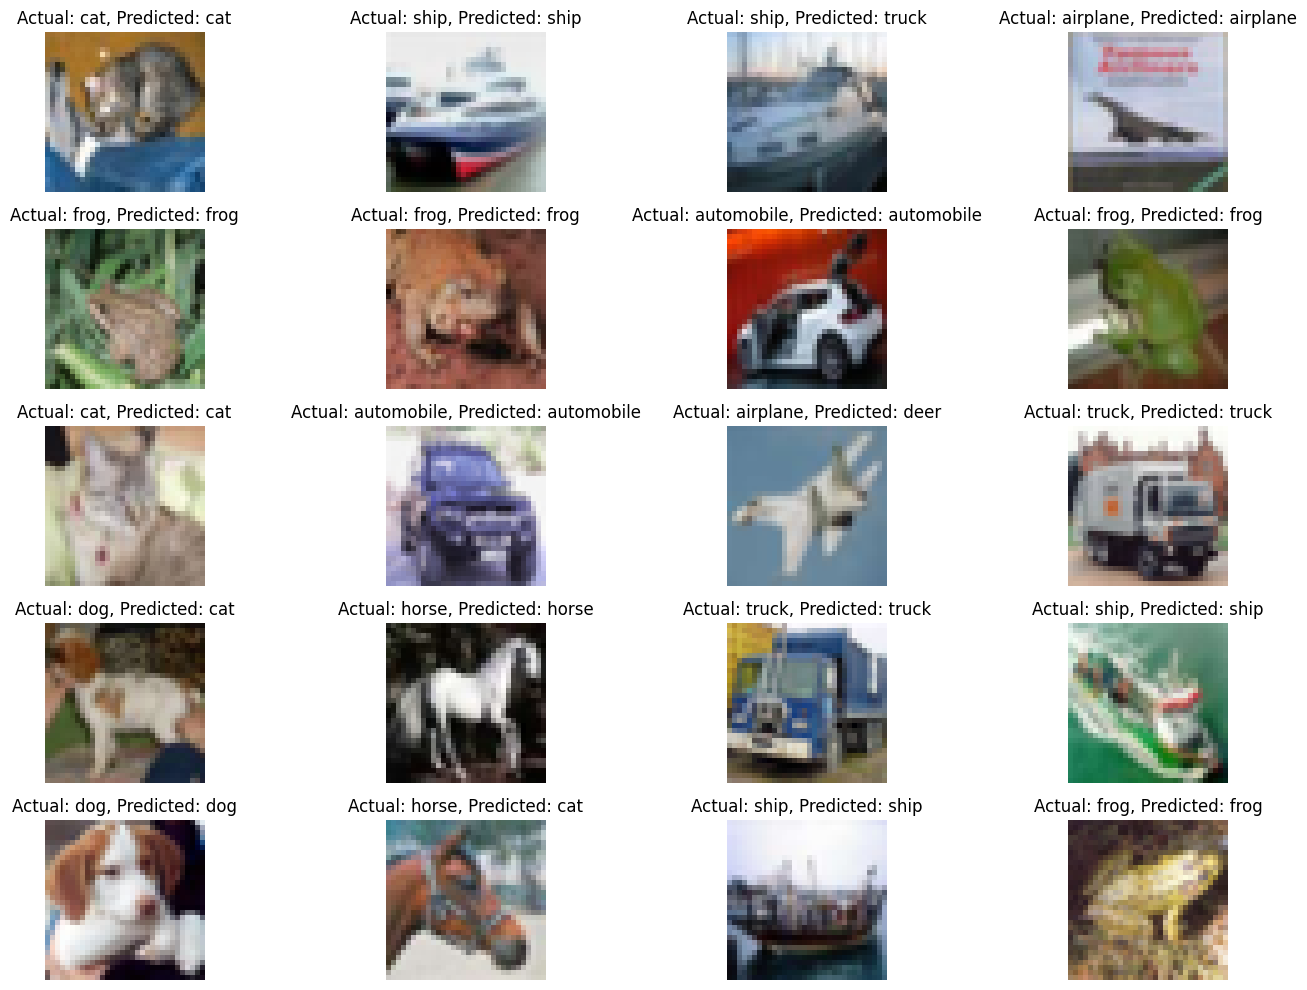

In [16]:
num_images_to_display = 20
num_columns = 4
num_rows = (num_images_to_display + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        ax.imshow(x_test[i])
        actual_label = class_labels[np.argmax(y_test[i])]
        predicted_label = class_labels[np.argmax(pred[i])]
        ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
